# Linear and logistic regression

This exercise investigates data from the Framingham Heart study. In 1948, the study was initiated to identify the common factors or characteristics that contribute to CVD by following its development over time in group of participants who had not yet developed overt symptoms of CVD or suffered a heart attack or stroke. The researchers recruited 5,209 men and women between the ages of 30 and 62 from the town of Framingham, Massachusetts. Every two years, a series of extensive physical examinations and lifestyle interviews were conducted. This data set is subset of the Framingham Heart study data. The data is stored as 14 columns. Each row represents a single subject.

In [196]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load in the `fram` hear disease data and investigate the data on high level.

In [197]:
#load the data
fram = pd.read_csv("fram.txt", sep = "\t")

#display the summary statistics
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Plot the `AGE` column in a histogram to visualize the distribution of the participants' ages.

Text(0.5, 1.0, 'Distribution of AGEs')

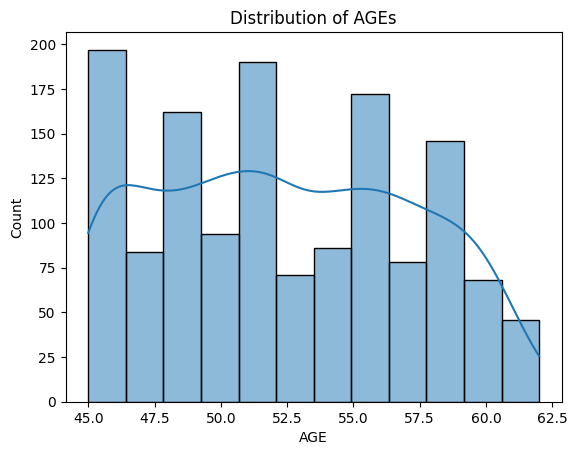

In [198]:
#plot the histogram of the AGE-column
sns.histplot(fram.AGE, kde=True)
plt.title("Distribution of AGEs")

The function `rescale` takes each column as a parameter, and centers and normalizes the data by dividing
by 2 $\sigma$ , where $\sigma$ is the standard deviation. The function returns the rescaled Series.

In [199]:
def rescale(series):
    return (series - series.mean()) / (2*series.std())

In the DataFrame, centered and scaled versions are created for all the continuous variables by calling `rescale` function. The scaled and centered variables are named according to the original variable name with `s` in front of it. For instance, `AGE` -> `sAGE`.

In [200]:
#separate the continuous variables from all variables
all_variables = fram.columns
disc_variables = ["ID", "SEX", "SBP10", "YRS_CHD", "CAUSE"]
cont_variables = [x for x in all_variables if x not in disc_variables]

#create new centered and scaled variables
for variable in cont_variables:
    fram[f"s{variable}"] = rescale(fram[variable])

#display the summary statistics
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH,sAGE,sFRW,sSBP,sDBP,sCHOL,sCIG,sCHD,sDEATH,sYRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512,1.439945e-16,1.427202e-16,-1.223316e-16,-1.605602e-16,-1.121373e-16,4.077720e-17,3.313148e-17,-7.136010e-17,1.019430e-16
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000,-7.770703e-01,-1.503033e+00,-1.036435e+00,-1.410618e+00,-1.497122e+00,-3.465693e-01,-2.270565e-01,-2.654996e-01,-1.940565e+00
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000,-4.633616e-01,-3.200998e-01,-3.227115e-01,-3.562285e-01,-3.741042e-01,-3.465693e-01,-2.270565e-01,-2.654996e-01,2.270212e-01
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000,-4.508343e-02,-6.661422e-02,-1.085945e-01,-4.765177e-03,-5.015684e-02,-3.465693e-01,-2.270565e-01,-2.654996e-01,2.270212e-01
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000,3.731948e-01,2.432015e-01,2.125810e-01,2.764055e-01,3.169835e-01,5.166802e-01,-2.270565e-01,-2.654996e-01,2.270212e-01
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000,1.000612e+00,3.285029e+00,2.710613e+00,2.455478e+00,2.109492e+00,2.243179e+00,1.684276e+00,1.295472e+00,2.270212e-01


Systolic blood pressure is predicted with Ordinary Least Square (OLS) model using weight, gender, age and cholesterol level as explanatory variables. The fitted model is stored as a variable `fit`. The results of the model are inspected through a summary.

In [201]:
#form a model and print the summary
fit = smf.ols("SBP ~ sFRW + SEX + sCHOL + sAGE", data = fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           2.44e-46
Time:                        12:25:42   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

***
**Discussion**

R-squared being 0.146 means that 14.6% of the variance in SBP (systolic blood pressure) is explained by the model. From this variance, sFRW (weight in relation to group median, normalized) has the highest explanatory power with its coefficient of 16.9. Other variables which explain the variance are sAGE (age at the start of the study, normalized) with coefficient value of 8.1, SEX (gender) with the coefficient value of -4.3 and sCHOL (cholesterol level, normalized) with the value of 4.2.  
***

To improve the explanatory power of the model, the interaction terms are added to it. 

In [202]:
#form a model and print the summary
fit = smf.ols("SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL", data = fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           4.92e-43
Time:                        12:25:42   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

The model is visualized as the function of weight for the youngest (sAGE=-1), middle aged (sAGE=0), and oldest (sAGE=1) women while assuming the background variables to be centered.

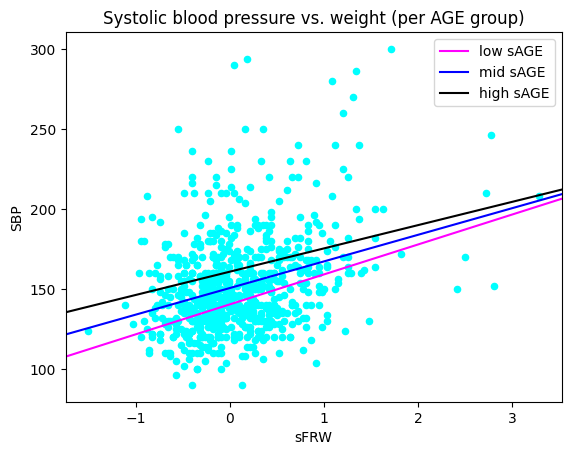

In [203]:
#visualize the model as the function of weight
p = fit.params

fram[fram.SEX == "female"].plot.scatter("sFRW", "SBP", color = "cyan")
abline_plot(intercept=p.Intercept - p["sAGE"], slope=p.sFRW - p["sAGE:sFRW"], ax=plt.gca(), color="magenta", label="low sAGE")
abline_plot(intercept=p.Intercept, slope=p.sFRW, ax=plt.gca(), color="blue", label="mid sAGE")
abline_plot(intercept=p.Intercept + p["sAGE"], slope=p.sFRW + p["sAGE:sFRW"], ax=plt.gca(), color="black", label="high sAGE")
plt.title("Systolic blood pressure vs. weight (per AGE group)")
plt.legend()

***
**Discussion**

By comparing the steepness of the lines, it can be suggested that there is a smaller dependence of blood pressure on weight as a person gets older. 

***

### Improving the model further
To improve the model, smoking (sCIG) is added as a background variable into the model. Systolic blood pressure is visualized again as the function of weight. Instead of age, the data is now groupped by cholesterol level. In the plot, there are separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           2.99e-40
Time:                        12:25:42   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

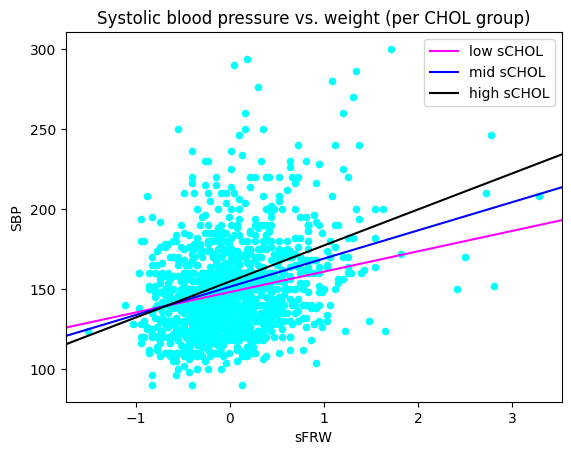

In [204]:
# add sCIG and its interactions to the fit
fit = smf.ols("SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL + sCIG + sCIG:sFRW + sCIG:SEX + sCIG:sCHOL + sCIG:sAGE", data=fram).fit()
p = fit.params

# plot the lines
fram.plot.scatter("sFRW", "SBP", color = "cyan")
abline_plot(intercept=p.Intercept - p["sCHOL"], slope=p.sFRW - p["sCHOL:sFRW"], ax=plt.gca(), color='magenta', label='low sCHOL')
abline_plot(intercept=p.Intercept, slope=p.sFRW, ax=plt.gca(), color='blue', label='mid sCHOL')
abline_plot(intercept=p.Intercept + p["sCHOL"], slope=p.sFRW + p["sCHOL:sFRW"], ax=plt.gca(), color='black', label='high sCHOL')
plt.title("Systolic blood pressure vs. weight (per CHOL group)")
plt.legend()

#print the summary
print(fit.summary())

***
**Discussion**

According to the results, the increased cholesterol level and overweight seems to increase the risk of systolic blood pressure significantly.  

However, with regards to the accuracy of the model, it is important to keep in mind that the R-squared is still fairly low, 0.152. This means that the model explains only 15.2% of all the variance of the target variable, SBP.
***

# Logistic regression

In [205]:
#function for the logistic transformation
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Define a new boolean variable `HIGH_BP` which gets a value of 1 if a person either has systolic blood pressure higher than 140 and/or diastolic blood pressure higher than 90. Create a GLM (Generalized Linear Model) model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` and, compute and store the error rate into variable `error_rate_orig`.

In [206]:
#define a new variable for "HIGH_BP"
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)

#create the model 
fit = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW", data = fram, family=sm.families.Binomial()).fit()
error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) |
                     ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate_orig)

0.35581061692969873


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [207]:
#create the model with sAGE and its interactions added
fit = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data = fram, family=sm.families.Binomial()).fit()
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) |
                     ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate)


0.3278335724533716


Visualize the predicted probability of high blood pressure as the function of weight. Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

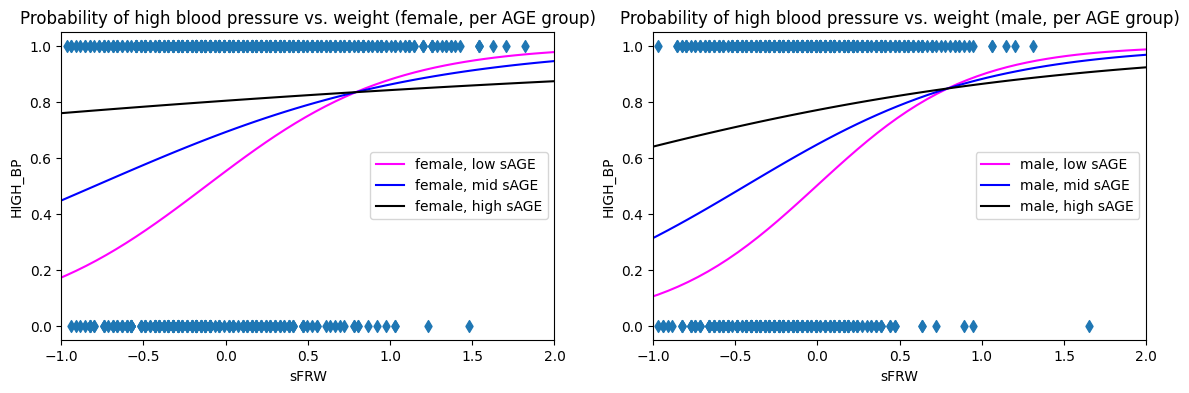

In [208]:

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

#create the model 
p = fit.params
X = np.linspace(-2,4,100)
fig, ax = plt.subplots(1, 2, subplot_kw={"xlabel":"sFRW", "ylabel":"HIGH_BP", "xlim":(-1, 2)}, figsize=(14,4))

#plot for females
ax[0].scatter(fram.sFRW[(fram.SEX=='female')], fram.HIGH_BP[(fram.SEX=='female')], marker='d')
ax[0].plot(X, logistic(X*(p.sFRW - p['sAGE:sFRW']) - p['sAGE'] + p.Intercept), color='magenta', label = "female, low sAGE")
ax[0].plot(X, logistic(X*p.sFRW + p.Intercept), color='blue', label = "female, mid sAGE")
ax[0].plot(X, logistic(X*(p.sFRW + p['sAGE:sFRW']) + p['sAGE'] + p.Intercept), color='black', label = "female, high sAGE")
ax[0].set_title("Probability of high blood pressure vs. weight (female, per AGE group)")
ax[0].legend(loc="center right")

#plot for males
ax[1].scatter(fram.sFRW[(fram.SEX=='male')], fram.HIGH_BP[(fram.SEX=='male')], marker='d')
ax[1].plot(X, logistic(X*(p.sFRW + p['SEX[T.male]:sFRW'] - p['sAGE:sFRW']) + p['SEX[T.male]'] - p['sAGE'] + p.Intercept), color='magenta', label = "male, low sAGE")
ax[1].plot(X, logistic(X*(p.sFRW + p['SEX[T.male]:sFRW']) + p['SEX[T.male]'] + p.Intercept), color='blue', label = "male, mid sAGE")
ax[1].plot(X, logistic(X*(p.sFRW + p['SEX[T.male]:sFRW'] + p['sAGE:sFRW']) + p['SEX[T.male]'] + p['sAGE'] + p.Intercept), color='black', label = "male, high sAGE")
ax[1].set_title("Probability of high blood pressure vs. weight (male, per AGE group)")
ax[1].legend(loc="center right")

***
**Discussion**

Women have a higher probability of high blood pressure at low weights compared to men. The difference between the genders gets smaller, the closer the sFRW is to 0.5. At the high weights (sFRW>1), men seem to have a higher probability of high blood pressure compared to women. 
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [195]:
# create the function train_test_split
def train_test_split(df, train_fraction=0.8):
    df_all = df
    df_train = df.sample(frac=train_fraction)
    df_test = df_all.drop(df_train.index)
    return df_train, df_test

# split the data frame to the train and test parts
train, test = train_test_split(fram)

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [96]:
# apply 100-fold cross-validation and calculate the prediction accuracy of the model
error_model = []
error_null = []
np.random.seed(1)
for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data=train, family=sm.families.Binomial()).fit()
    pred = fit.predict(test, transform=True)

    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) |
                     ((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    

pred_accuracy = 1 - pd.Series(error_model).mean() 
print(pred_accuracy)

0.6688172043010753


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [97]:
# add the binary variable haDCHD and print the fraction of the positive cases
fram["hasCHD"] = fram["CHD"] > 0
fram["hasCHD"] = fram["hasCHD"].map(int)
fram.hasCHD.mean()

np.float64(0.22022955523672882)

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [98]:
# create the GLM model with hadCHD being the target variable
fit = smf.glm("hasCHD ~ sFRW + sCHOL + sCIG + sFRW:sCHOL + sFRW:sCIG+ sCHOL:sCIG", data = fram, family=sm.families.Binomial()).fit()
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD) |
                    ((fit.fittedvalues > 0.5) & ~fram.hasCHD))
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Wed, 21 Aug 2024   Deviance:                       1442.4
Time:                        16:13:02   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01950
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.0

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

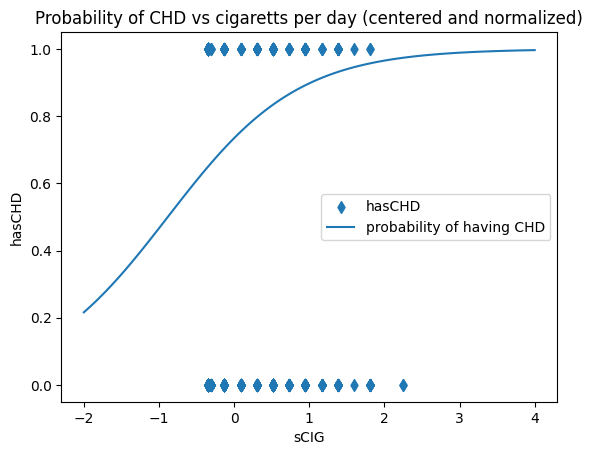

In [103]:
# According to the summary above, CIG seems to be the most important explanator in the model. Visualize the points and the logistic curve.
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

X = np.linspace(-2, 4, 100)
plt.scatter(fram["sCIG"], fram["hasCHD"], marker='d', label='hasCHD')
plt.plot(X, logistic(x*fit.params.sCIG + fit.params.Intercept), label = "probability of having CHD")

plt.title('Probability of CHD vs cigaretts per day (centered and normalized)')
plt.xlabel('sCIG')
plt.ylabel('hasCHD')
plt.legend()

pred = fit.predict()

***
**Discussion**

The graph above plots the probability of having coronary heart disease (CHD) against sCIG which is a centered and normalized variable for a number of cigarets a person smokes per day. The model captures the trend, but using it in practice for predicting the risk of CHD for an individual person might not be meaningful due to the uncertainties and the inaccuracy of the model. To make the plot more informative visually in terms of predicting the probability of CHD, the variable on the x-axis could be converted back to the original format (CIG).
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Store the probability in variable `predicted`.

In [104]:
point = {}
point['sFRW'] = (100 - fram.FRW.mean()) / (fram.FRW.std()*2)
point['sCIG'] = (17 - fram.CIG.mean()) / (fram.CIG.std()*2)
point['sCHOL'] = (200 - fram.CHOL.mean()) / (fram.CHOL.std()*2)
predicted = float(fit.predict(point)[0])
print(predicted)

0.21616166025041
